In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Reading In Data

In [3]:
call = pd.read_csv("call.csv")

## Analysis

<Axes: xlabel='primeunit', ylabel='Count'>

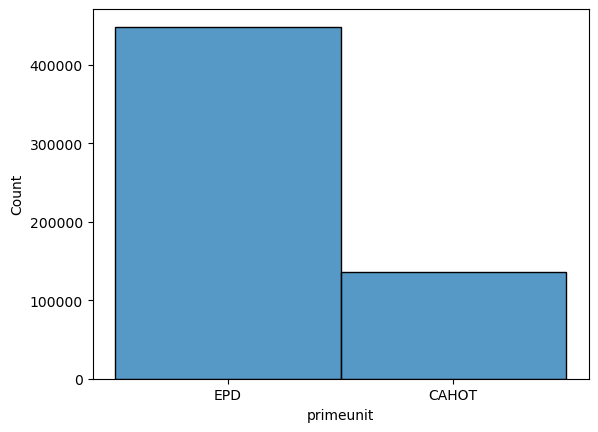

In [4]:
sns.histplot(call['primeunit'])


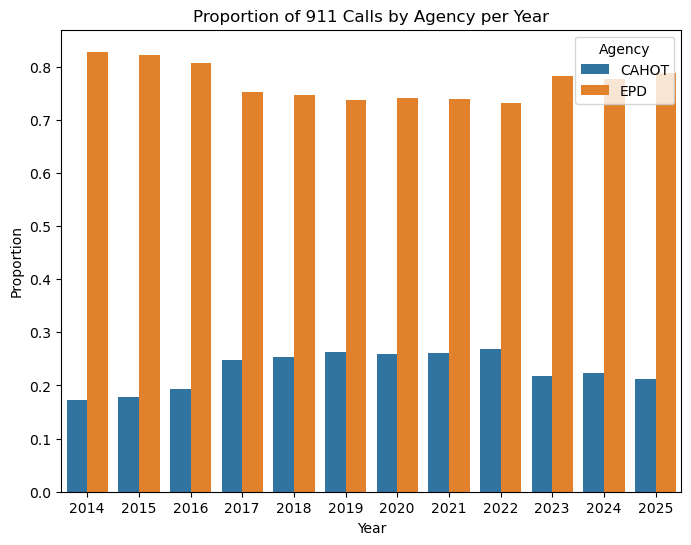

In [13]:

calls_per_year = call.groupby(['yr', 'primeunit']).size().reset_index(name='count')

total_per_year = calls_per_year.groupby('yr')['count'].transform('sum')
calls_per_year['proportion'] = calls_per_year['count'] / total_per_year

plt.figure(figsize=(8, 6))
sns.barplot(data=calls_per_year, x='yr', y='proportion', hue='primeunit')
plt.title('Proportion of 911 Calls by Agency per Year')
plt.ylabel('Proportion')
plt.xlabel('Year')
plt.legend(title='Agency')

Text(0.5, 0, 'Year')

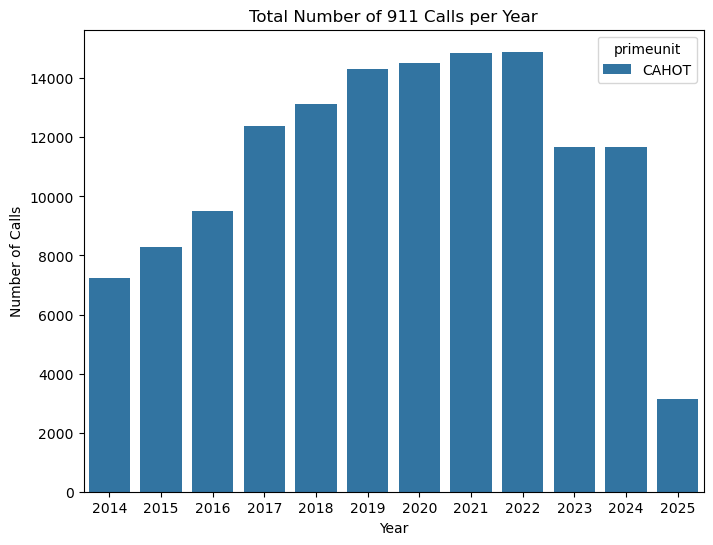

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(data=calls_per_year[calls_per_year['primeunit'] == 'CAHOT'], x='yr', y='count', hue = 'primeunit')
plt.title('Total Number of 911 Calls per Year')
plt.ylabel('Number of Calls')
plt.xlabel('Year')

In [ ]:
avg_response_year = call.groupby(['yr', 'primeunit'])['response_time'].mean().reset_index()
display(avg_response_year[avg_response_year['primeunit'] == 'CAHOT'])
display(calls_per_year[calls_per_year['primeunit'] == 'CAHOT'])

,yr,primeunit,response_time
0,2014,CAHOT,12.649449
2,2015,CAHOT,12.901886
4,2016,CAHOT,14.742345
6,2017,CAHOT,14.207209
8,2018,CAHOT,14.413317
10,2019,CAHOT,14.448966
12,2020,CAHOT,13.738329
14,2021,CAHOT,14.358659
16,2022,CAHOT,13.956134
18,2023,CAHOT,11.288280


,yr,primeunit,call_count
0,2014,CAHOT,7253
2,2015,CAHOT,8298
4,2016,CAHOT,9510
6,2017,CAHOT,12398
8,2018,CAHOT,13142
10,2019,CAHOT,14332
12,2020,CAHOT,14532
14,2021,CAHOT,14847
16,2022,CAHOT,14901
18,2023,CAHOT,11678


In [ ]:
avg_response_by_agency = call.groupby(['yr', 'primeunit', 'month'])['response_time'].mean().reset_index()
avg_response_by_month = avg_response_by_agency.merge(call, left_on=['yr', 'primeunit', 'month'], right_on = ['yr', 'primeunit', 'month'])
avg_response_by_agency.head()

,yr,primeunit,month,response_time
0,2014,CAHOT,1,11.187998
1,2014,CAHOT,2,12.233411
2,2014,CAHOT,3,12.266641
3,2014,CAHOT,4,12.415383
4,2014,CAHOT,5,14.685495


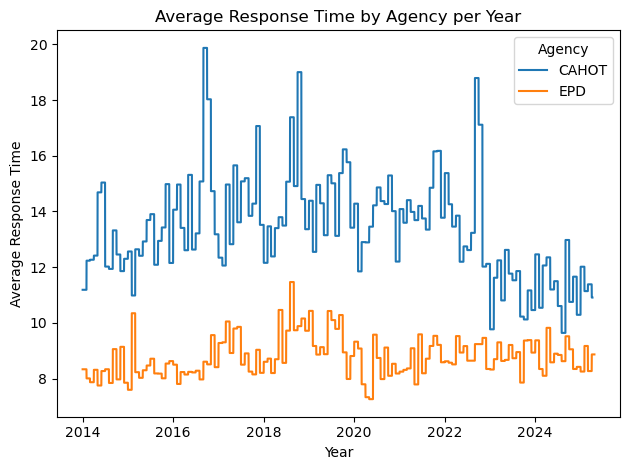

In [ ]:
sns.lineplot(data=avg_response_by_month, x='calltime', y='response_time_x', hue='primeunit')
plt.title('Average Response Time by Agency per Year')
plt.ylabel('Average Response Time')
plt.xlabel('Year')
plt.legend(title='Agency')

(array([18993., 19113., 19236., 19358., 19478., 19601., 19723., 19844.,
        19967., 20089., 20209.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05'),
  Text(19601.0, 0, '2023-09'),
  Text(19723.0, 0, '2024-01'),
  Text(19844.0, 0, '2024-05'),
  Text(19967.0, 0, '2024-09'),
  Text(20089.0, 0, '2025-01'),
  Text(20209.0, 0, '2025-05')])

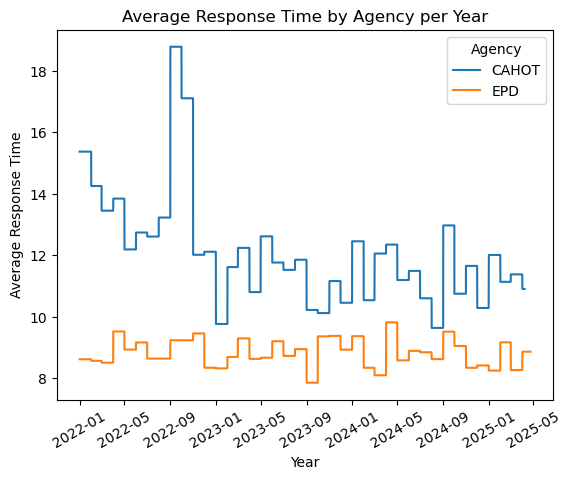

In [ ]:
sns.lineplot(data=avg_response_by_month[avg_response_by_month['yr'] >= 2022], x='calltime', y='response_time_x', hue='primeunit')
plt.title('Average Response Time by Agency per Year')
plt.ylabel('Average Response Time')
plt.xlabel('Year')
plt.legend(title='Agency')
plt.xticks(rotation=30)

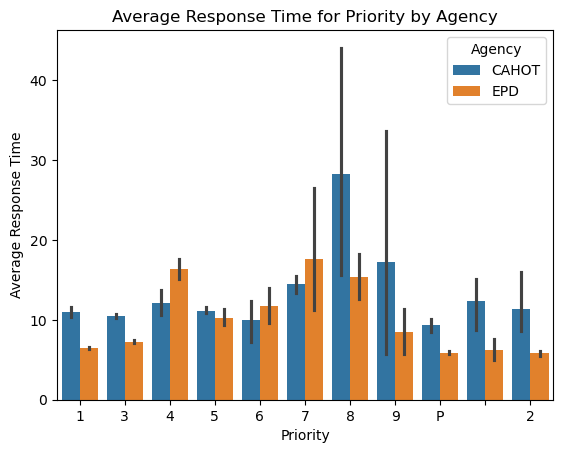

In [ ]:
avg_response_by_priority = call.groupby(['yr', 'primeunit', 'priority'])['response_time'].mean().reset_index()

sns.barplot(data=avg_response_by_priority, x='priority', y='response_time', hue='primeunit')
plt.title('Average Response Time for Priority by Agency')
plt.ylabel('Average Response Time')
plt.xlabel('Priority')
plt.legend(title='Agency')

In [ ]:
avg_response_by_priority = call.groupby(['yr', 'primeunit', 'priority'])['response_time'].mean().reset_index()

priority_count = call.groupby(['yr', 'primeunit'])['priority'].value_counts().reset_index()
priority_count = priority_count[priority_count['priority'].str.strip() != '']
yr_count = priority_count.groupby(['yr', 'primeunit'])['count'].sum().reset_index()
priority_count = priority_count.merge(yr_count, left_on=['yr', 'primeunit'], right_on=['yr', 'primeunit'])
priority_count["prop"] = priority_count['count_x']/priority_count['count_y']
priority_count = priority_count.sort_values(['priority', 'yr'])
priority_count.head()

,yr,primeunit,priority,count_x,count_y,prop
2,2014,CAHOT,1,447,7253,0.061630
12,2014,EPD,1,2858,34880,0.081938
22,2015,CAHOT,1,373,8298,0.044951
31,2015,EPD,1,3183,38229,0.083261
41,2016,CAHOT,1,269,9509,0.028289


In [ ]:
priority_count[(priority_count['yr'] == 2015) & (priority_count['primeunit'] == 'CAHOT')]['prop'].sum()

1.0

<Axes: xlabel='yr', ylabel='prop'>

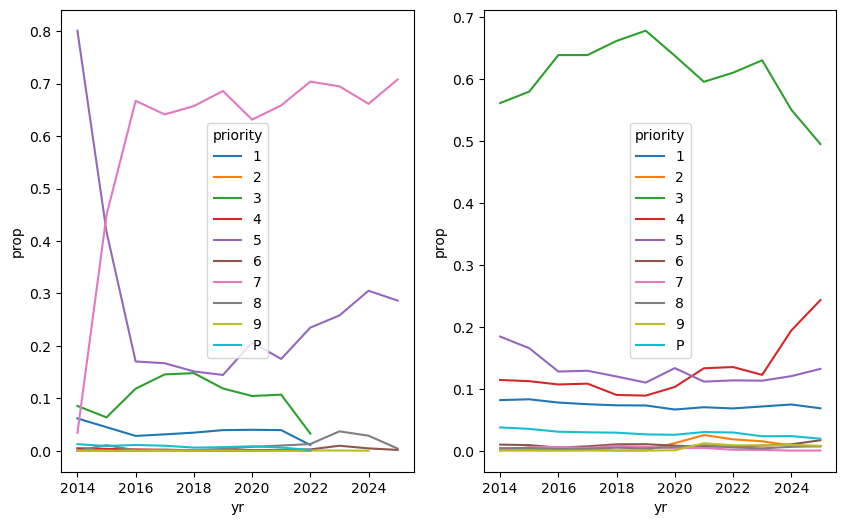

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,6))
sns.lineplot(data = priority_count[priority_count['primeunit'] == 'CAHOT'], x = 'yr', y = 'prop', hue = 'priority', errorbar=None, ax = axes[0])
sns.lineplot(data = priority_count[priority_count['primeunit'] == 'EPD'], x = 'yr', y = 'prop', hue = 'priority', errorbar=None, ax = axes[1])

In [ ]:
date = dt.datetime(2025, 4, 8)

In [ ]:
no_cahot = call[call['calltime'] > date]

In [ ]:
np.mean(no_cahot['response_time'])

8.62146188158962

In [ ]:
call['calltime'].max()

Timestamp('2025-04-22 23:14:18')

In [ ]:
mask = (call['calltime'].dt.month == 4) & (call['calltime'].dt.day >= 8) & (call['calltime'].dt.day <= 22)

In [ ]:
april = call[mask]
april

,yr,service,calltime,callsource,nature,secs_to_disp,secs_to_arrv,secs_to_close,priority,primeunit,month,response_time
30358,2014,LAW,2014-04-08 00:29:33,W911,CHECK WELFARE,1571.0,2117.0,3710,3,EPD,4,9.100000
30359,2014,LAW,2014-04-08 00:33:46,PHONE,ASSAULT,4500.0,4927.0,18769,3,EPD,4,7.116667
30360,2014,LAW,2014-04-08 00:36:39,W911,ASSAULT,202.0,499.0,4210,3,EPD,4,4.950000
30362,2014,LAW,2014-04-08 01:09:19,W911,MOTOR VEH ACC UNKNOWN INJ,40.0,172.0,32325,1,EPD,4,2.200000
30363,2014,LAW,2014-04-08 01:13:34,PHONE,ATTEMPT TO LOCATE,562.0,1208.0,4524,3,EPD,4,10.766667
...,...,...,...,...,...,...,...,...,...,...,...,...
1488565,2025,LAW,2025-04-22 22:07:42,W911,SUSPICIOUS CONDITIONS,8312.0,8350.0,19104,3,EPD,4,0.633333
1488566,2025,LAW,2025-04-22 22:10:53,PHONE,LOUD NOISE,4229.0,4229.0,4231,5,EPD,4,0.000000
1488567,2025,LAW,2025-04-22 22:12:20,W911,MISSING PERSON,8718.0,9302.0,13485,4,EPD,4,9.733333
1488569,2025,LAW,2025-04-22 22:23:11,PHONE,CRIMINAL TRESPASS,1095.0,1095.0,1104,4,EPD,4,0.000000


In [ ]:
from scipy.stats import ttest_ind

ttest_ind(april[april['yr'] == 2025]['response_time'], april[april['yr'] < 2025]['response_time'], equal_var=True)


TtestResult(statistic=-1.5327367500151765, pvalue=0.1253536291408735, df=24525.0)

In [ ]:
corr_priority = priority_count[priority_count['priority'] != 'P'] #.corr(numeric_only = True)
corr_priority['priority'] = corr_priority['priority'].astype(int)
corr_priority

/var/folders/v9/p__zvt1n391cg86l79v2m3b00000gn/T/ipykernel_31888/2216654404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_priority['priority'] = corr_priority['priority'].astype(int)


,yr,primeunit,priority,count_x,count_y,prop
2,2014,CAHOT,1,447,7253,0.061630
12,2014,EPD,1,2858,34880,0.081938
22,2015,CAHOT,1,373,8298,0.044951
31,2015,EPD,1,3183,38229,0.083261
41,2016,CAHOT,1,269,9509,0.028289
...,...,...,...,...,...,...
178,2023,CAHOT,9,6,11678,0.000514
185,2023,EPD,9,366,41987,0.008717
193,2024,CAHOT,9,1,11689,0.000086
200,2024,EPD,9,390,40836,0.009550


In [ ]:
avg_response_year.head(), corr_priority.head()

(     yr primeunit  response_time
 0  2014     CAHOT      12.649449
 1  2014       EPD       8.233559
 2  2015     CAHOT      12.901886
 3  2015       EPD       8.425842
 4  2016     CAHOT      14.742345,
       yr primeunit  priority  count_x  count_y      prop
 2   2014     CAHOT         1      447     7253  0.061630
 12  2014       EPD         1     2858    34880  0.081938
 22  2015     CAHOT         1      373     8298  0.044951
 31  2015       EPD         1     3183    38229  0.083261
 41  2016     CAHOT         1      269     9509  0.028289)

In [ ]:
avg_response_year = call.groupby(['yr', 'primeunit'])['response_time'].mean().reset_index()
correlation = counts.merge(avg_response_year, left_on = ['yr', 'primeunit'], right_on = ['yr', 'primeunit'])
correlation.head()

,yr,primeunit,count,proportion,response_time
0,2014,CAHOT,7253,0.172080,12.649449
1,2014,EPD,34896,0.827920,8.233559
2,2015,CAHOT,8298,0.178245,12.901886
3,2015,EPD,38256,0.821755,8.425842
4,2016,CAHOT,9510,0.193128,14.742345


In [ ]:
correlation = correlation.merge(corr_priority, left_on=['yr','primeunit'], right_on = ['yr','primeunit'])
correlation.head()

,yr,primeunit,count,proportion,response_time,priority,count_x,count_y,prop
0,2014,CAHOT,7253,0.17208,12.649449,1,447,7253,0.061630
1,2014,CAHOT,7253,0.17208,12.649449,3,620,7253,0.085482
2,2014,CAHOT,7253,0.17208,12.649449,4,35,7253,0.004826
3,2014,CAHOT,7253,0.17208,12.649449,5,5809,7253,0.800910
4,2014,CAHOT,7253,0.17208,12.649449,6,3,7253,0.000414


In [ ]:
correlation = correlation[['yr', 'count', 'proportion', 'response_time', 'priority_x']].head()
correlation.head()

KeyError: "['priority_x'] not in index"

In [ ]:
correlation[correlation['primeunit'] == 'CAHOT'].corr(numeric_only = True)


,yr,count,proportion,response_time,priority,count_x,count_y,prop
yr,1.000000,0.307414,0.547197,-0.362393,0.182117,0.107567,0.307378,0.100947
count,0.307414,1.000000,0.861637,0.521614,-0.102772,0.123462,1.000000,-0.070993
proportion,0.547197,0.861637,1.000000,0.445197,-0.069918,0.107799,0.861655,-0.026171
response_time,-0.362393,0.521614,0.445197,1.000000,-0.254598,-0.020232,0.521583,-0.132476
priority,0.182117,-0.102772,-0.069918,-0.254598,1.000000,0.190854,-0.102783,0.192872
count_x,0.107567,0.123462,0.107799,-0.020232,0.190854,1.000000,0.123467,0.935481
count_y,0.307378,1.000000,0.861655,0.521583,-0.102783,0.123467,1.000000,-0.070990
prop,0.100947,-0.070993,-0.026171,-0.132476,0.192872,0.935481,-0.070990,1.000000


<Axes: xlabel='proportion', ylabel='response_time'>

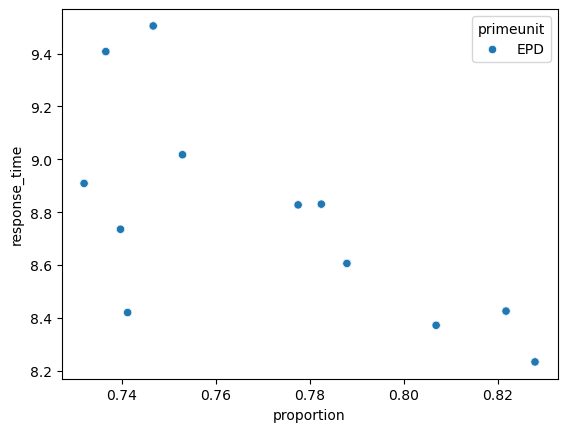

In [ ]:
sns.scatterplot(data = correlation[correlation['primeunit'] != 'CAHOT'], x = 'proportion', y = 'response_time', hue = 'primeunit')